# Linear Regression from Scratch on Advertising Dataset
This notebook demonstrates **Linear Regression** using Gradient Descent, applied to the `Advertising` dataset.

### **Objectives:**
- Understand how to implement **single-variable** and **multiple-variable** linear regression from scratch.
- Visualize regression lines and predictions.
- Evaluate model performance using **Cost Function** and **R² score**.

---

## **1. Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# For reproducibility
np.random.seed(42)


## **2. Load and Explore Dataset**
We load the `advertising.csv` dataset and inspect its first few rows and summary statistics.

In [7]:
data = pd.read_csv(r"data/advertising.csv")
display(data.head())
display(data.describe())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## **3. Single-Variable Linear Regression**
We start by predicting **Sales** using only the **TV advertising budget** as a feature.

In [8]:
X = data["TV"].to_numpy().reshape(-1, 1)
Y = data["Sales"].to_numpy().reshape(-1, 1)
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (200, 1)
Shape of Y: (200, 1)


### **Function for plotting**

In [9]:
def plot_regression(X, y, y_pred=None, feature_names=None, title="Regression Plot"):
    """
    Plots regression results for single or multiple features.
    Automatically:
        - For 1 feature: 2D scatter + regression line.
        - For 2+ features: Actual vs Predicted.
    
    Parameters:
    -----------
    X : array-like, shape (m, n_features)
        Input features.
    y : array-like, shape (m,)
        Actual target values.
    y_pred : array-like, shape (m,), optional
        Predicted target values.
    feature_names : list of str, optional
        Names of features (for axis labels).
    title : str
        Title of the plot.
    """
    X = np.array(X)
    y = np.array(y).reshape(-1, 1)
    if y_pred is not None:
        y_pred = np.array(y_pred).reshape(-1, 1)

    n_features = X.shape[1] if X.ndim > 1 else 1

    # Case 1: Single Feature
    if n_features == 1:
        sorted_idx = np.argsort(X[:, 0])
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, color='blue', label="Actual data")
        if y_pred is not None:
            plt.plot(X[sorted_idx], y_pred[sorted_idx], color='red', linewidth=2, label="Regression line")
        plt.xlabel(feature_names[0] if feature_names else "Feature")
        plt.ylabel("Target")
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

    # Case 2: Multiple Features -> Actual vs Predicted
    else:
        if y_pred is not None:
            plt.figure(figsize=(8, 6))
            plt.scatter(y, y_pred, color='green', alpha=0.6, label="Predictions")
            plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Ideal Fit")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.title("Actual vs Predicted")
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print("For multiple features, provide y_pred to plot Actual vs Predicted.")



### **3.1 Plotting TV vs Sales (Raw Data)**

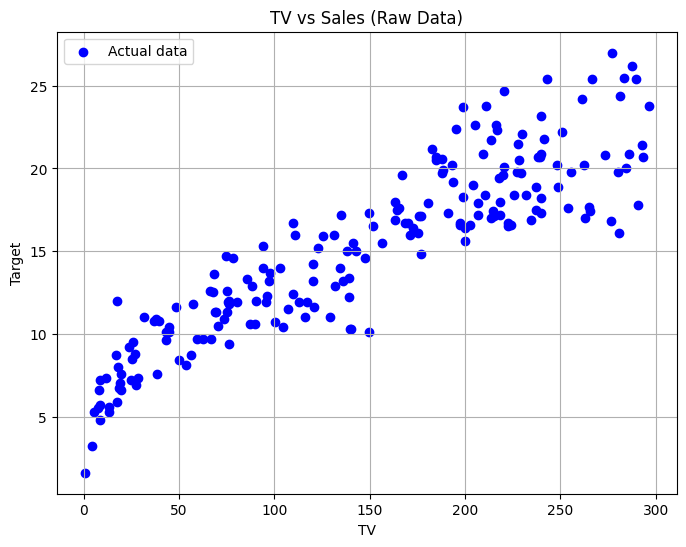

In [10]:
plot_regression(X, Y, feature_names=['TV'], title="TV vs Sales (Raw Data)")


### **3.2 Implementing Linear Regression (From Scratch)**
We define a `LinearRegression` class that implements:
- **Gradient Descent** for parameter updates.
- **Cost Function** (MSE).
- **Prediction and R² score** evaluation.

In [11]:
class LinearRegression:
    def __init__(self):
        self.W = None
        self.b = None
        self.mean = None
        self.std = None
        self.W_norm = None
        self.b_norm = None

    def normalize(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        return (X - self.mean) / self.std

    def initialize_parameters(self, X):
        self.W = np.random.randn(X.shape[1], 1) * 0.01
        self.b = np.zeros((1, 1))

    def predict(self, X):
        return X @ self.W + self.b

    def compute_cost(self, Y, Y_hat):
        m = Y.shape[0]
        return (1/(2*m)) * np.sum((Y_hat - Y)**2)

    def fit(self, X, Y, n_iteration=1000, learningrate=0.01, print_cost=False):
        m = X.shape[0]
        X_norm = self.normalize(X)
        self.initialize_parameters(X)

        for i in range(n_iteration):
            Y_hat = X_norm @ self.W + self.b
            grad_w = (1/m) * X_norm.T @ (Y_hat - Y)
            grad_b = (1/m) * np.sum(Y_hat - Y)
            self.W -= learningrate * grad_w
            self.b -= learningrate * grad_b
            cost = self.compute_cost(Y, Y_hat)
            if print_cost and i % 50 == 0:
                print(f"Cost after {i} iterations: {cost:.4f}")

        self.W_norm = np.array(self.W).copy()
        self.b_norm = np.array(self.b)
        self.denormalize_parameters()

    def denormalize_parameters(self):
        mean = np.array(self.mean).reshape(-1, 1)
        std = np.array(self.std).reshape(-1, 1)
        self.W = self.W_norm / std
        self.b = self.b_norm - np.sum((mean / std) * self.W_norm)

    def score(self, X, Y):
        Y_hat = self.predict(X)
        ss_res = np.sum((Y - Y_hat)**2)
        ss_tot = np.sum((Y - Y.mean())**2)
        return 1 - (ss_res/ss_tot)

### **3.3 Train and Evaluate Single-Variable Model**

In [12]:
model = LinearRegression()
model.fit(X, Y, n_iteration=2000, learningrate=0.01, print_cost=True)
print(f"W: {model.W}")
print(f"b: {model.b}")
print(f"R² score: {model.score(X, Y):.4f}")
Y_pred = model.predict(X)

Cost after 0 iterations: 128.3324
Cost after 50 iterations: 48.6277
Cost after 100 iterations: 19.4533
Cost after 150 iterations: 8.7745
Cost after 200 iterations: 4.8657
Cost after 250 iterations: 3.4349
Cost after 300 iterations: 2.9112
Cost after 350 iterations: 2.7195
Cost after 400 iterations: 2.6494
Cost after 450 iterations: 2.6237
Cost after 500 iterations: 2.6143
Cost after 550 iterations: 2.6109
Cost after 600 iterations: 2.6096
Cost after 650 iterations: 2.6091
Cost after 700 iterations: 2.6090
Cost after 750 iterations: 2.6089
Cost after 800 iterations: 2.6089
Cost after 850 iterations: 2.6089
Cost after 900 iterations: 2.6089
Cost after 950 iterations: 2.6089
Cost after 1000 iterations: 2.6089
Cost after 1050 iterations: 2.6089
Cost after 1100 iterations: 2.6089
Cost after 1150 iterations: 2.6089
Cost after 1200 iterations: 2.6089
Cost after 1250 iterations: 2.6089
Cost after 1300 iterations: 2.6089
Cost after 1350 iterations: 2.6089
Cost after 1400 iterations: 2.6089
Cost

### **3.4 Plot Regression Line**

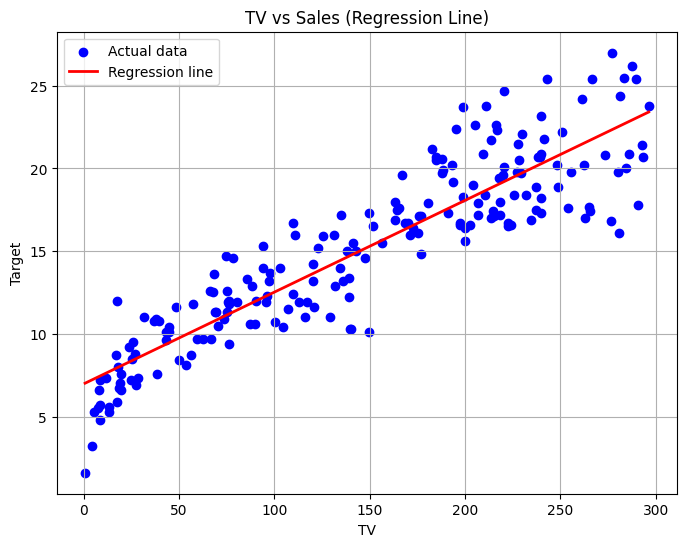

In [16]:

plot_regression(X, Y, y_pred=Y_pred, feature_names=['TV'], title="TV vs Sales (Regression Line)")


## **4. Multiple Linear Regression**
Now we use **TV, Radio, and Newspaper** as input features to predict Sales.
This will give us a better fit.

In [15]:
X2 = data[["TV", "Radio", "Newspaper"]].to_numpy()
model2 = LinearRegression()
model2.fit(X2, Y, n_iteration=2000, learningrate=0.01, print_cost=True)
print(f"W: {model2.W}")
print(f"b: {model2.b}")
print(f"R² score: {model2.score(X2, Y):.4f}")
Y_pred2 = model2.predict(X2)

Cost after 0 iterations: 128.3381
Cost after 50 iterations: 47.6253
Cost after 100 iterations: 18.2626
Cost after 150 iterations: 7.5474
Cost after 200 iterations: 3.6275
Cost after 250 iterations: 2.1902
Cost after 300 iterations: 1.6621
Cost after 350 iterations: 1.4676
Cost after 400 iterations: 1.3957
Cost after 450 iterations: 1.3690
Cost after 500 iterations: 1.3591
Cost after 550 iterations: 1.3553
Cost after 600 iterations: 1.3539
Cost after 650 iterations: 1.3534
Cost after 700 iterations: 1.3531
Cost after 750 iterations: 1.3531
Cost after 800 iterations: 1.3530
Cost after 850 iterations: 1.3530
Cost after 900 iterations: 1.3530
Cost after 950 iterations: 1.3530
Cost after 1000 iterations: 1.3530
Cost after 1050 iterations: 1.3530
Cost after 1100 iterations: 1.3530
Cost after 1150 iterations: 1.3530
Cost after 1200 iterations: 1.3530
Cost after 1250 iterations: 1.3530
Cost after 1300 iterations: 1.3530
Cost after 1350 iterations: 1.3530
Cost after 1400 iterations: 1.3530
Cost

### **4.1 Actual vs Predicted (Multiple Features)**

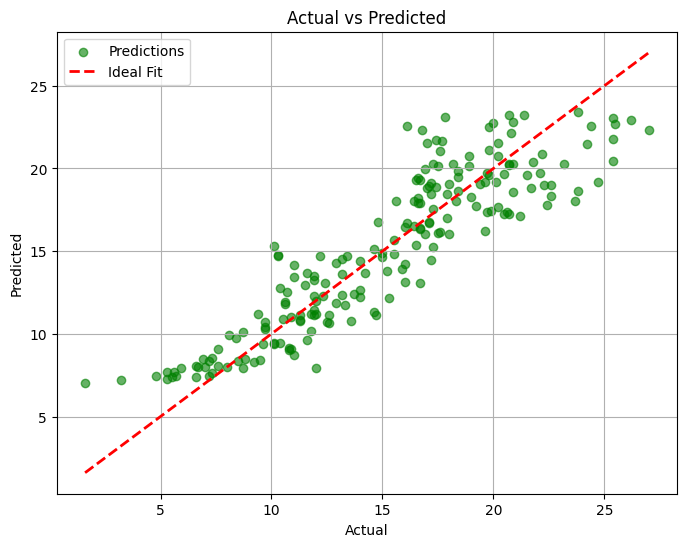

In [17]:

plot_regression(X2, Y, y_pred=Y_pred, title="Actual vs Predicted Sales (Multiple Features)")


## **5. Comparison of Models**
- **Single-Variable Model (TV only):** Focuses on one feature.
- **Multiple-Variable Model (TV, Radio, Newspaper):** Considers all features.

Generally, the multiple-variable model will have a higher **R² score** and better predictions.
---